In [3]:
# from ThOPqkdsim.sim2 import *
# from ThOPqkdsim.sim3 import *
from ThOPqkdsim.sim5 import *
import numpy as np

In [4]:
def run_simulation():
    """
    Run a comprehensive BB84 simulation and plot the results.
    """
    print("Running BB84 QKD Protocol Simulation...")
    
    # Initial parameters
    time_window = 1e-9
    alice_detector_efficiency = 0.2
    bob_detector_efficiency = 0.2
    alice_channel_efficiency = 1.00  # Source is at Alice
    bob_channel_efficiency = 0.1913
    dark_count_rate = 1000  # 1000 counts per second
    
    # Define μ range for final plots
    mu_values = np.linspace(0.01, 1.0, 50)
    
    # Plot QBER vs μ
    mu_values, qber_values = plot_qber_vs_mu(mu_values, time_window,
                                             alice_detector_efficiency,bob_detector_efficiency,
                                             alice_channel_efficiency,bob_channel_efficiency,
                                             dark_count_rate)
    
    # Identify optimal μ value where QBER is within 5-7% range
    optimal_indices = [i for i, qber in enumerate(qber_values) if 5 <= qber <= 7]
    if optimal_indices:
        optimal_mu = mu_values[optimal_indices[len(optimal_indices)//2]]
        print(f"Optimal μ value for QBER in 5-7% range: {optimal_mu:.4f}")
    else:
        optimal_mu = mu_values[np.argmin(np.abs(np.array(qber_values) - 6))]
        print(f"No μ value gives exactly 5-7% QBER. Closest value: {optimal_mu:.4f}")
    
    # Plot SKR vs μ
    plot_skr_vs_mu(mu_values, time_window,
                alice_detector_efficiency,bob_detector_efficiency,
                alice_channel_efficiency,bob_channel_efficiency,
                dark_count_rate)
    
    # Display results for optimal μ
    simulator = BB84Simulator(
        mu=optimal_mu,
        alice_detector_efficiency=alice_detector_efficiency,
        bob_detector_efficiency=bob_detector_efficiency,
        alice_channel_efficiency=alice_channel_efficiency,
        bob_channel_efficiency=bob_channel_efficiency,
        dark_count_rate=dark_count_rate,
        time_window=time_window
    )
    
    optimal_qber = simulator.calculate_qber()
    optimal_skr = simulator.calculate_skr(1000000)
    
    print("\nSimulation Results:")
    print(f"Optimal Mean Photon Number (μ): {optimal_mu:.4f}")
    print(f"Quantum Bit Error Rate (QBER): {optimal_qber:.4f}%")
    print(f"Secret Key Rate: {optimal_skr:.2f} bits")
    print(f"Alice's Detector Efficiency: {alice_detector_efficiency}")
    print(f"Bob's Detector Efficiency: {bob_detector_efficiency}")
    print(f"Alice's Channel Efficiency: {alice_channel_efficiency}")
    print(f"Bob's Channel Efficiency: {bob_channel_efficiency}")
    print(f"Dark Count Rate: {dark_count_rate} counts/second")
    print(f"Time Window: {time_window} seconds")


Running BB84 QKD Protocol Simulation...


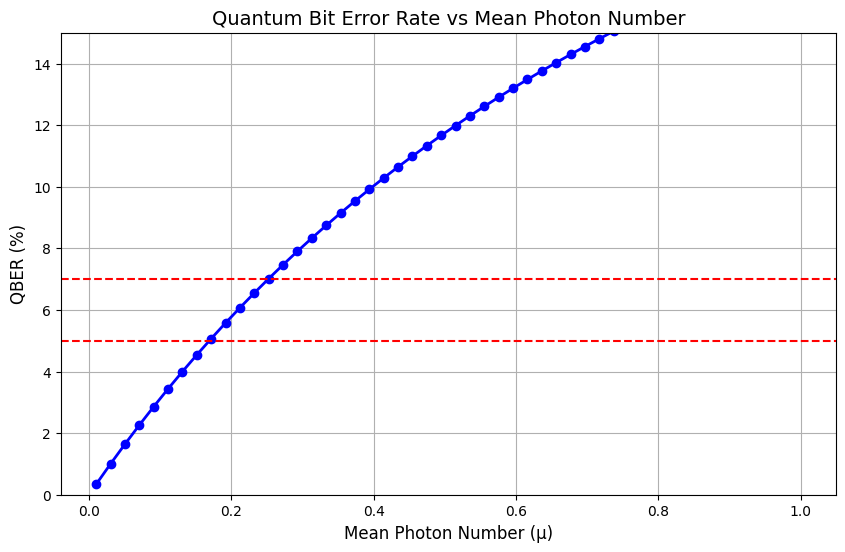

Optimal μ value for QBER in 5-7% range: 0.2120


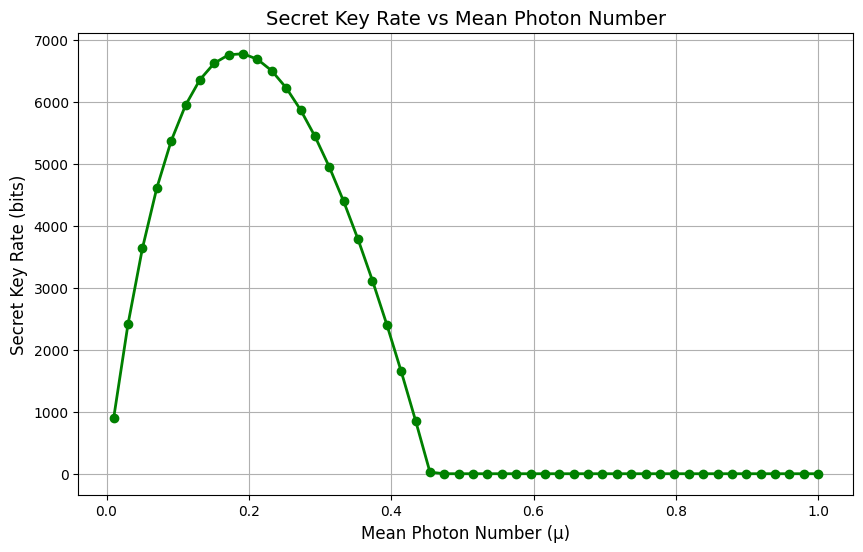


Simulation Results:
Optimal Mean Photon Number (μ): 0.2120
Quantum Bit Error Rate (QBER): 6.0703%
Secret Key Rate: 6682.65 bits
Alice's Detector Efficiency: 0.2
Bob's Detector Efficiency: 0.2
Alice's Channel Efficiency: 1.0
Bob's Channel Efficiency: 0.1913
Dark Count Rate: 1000 counts/second
Time Window: 1e-09 seconds


In [5]:
run_simulation()